In [1]:
import cv2
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
def optical_flow(img1, img2, window_size):
    tau = 1e-2
    mode = 'same'
    x_kernel = np.array([[-1., 1.], [-1., 1.]])
    y_kernel = np.array([[-1., -1.], [1., 1.]])
    t_kernel = np.array([[1., 1.], [1., 1.]])
    w = window_size // 2
    img1 = img1 / 255.
    img2 = img2 / 255.
    gradx = signal.convolve2d(img1, x_kernel, boundary='symm', mode=mode)
    grady = signal.convolve2d(img1, y_kernel, boundary='symm', mode=mode)
    gradt = signal.convolve2d(img2, t_kernel, boundary='symm', mode=mode) + signal.convolve2d(img1, -t_kernel, boundary='symm', mode=mode)
    u = np.zeros(img1.shape)
    v = np.zeros(img1.shape)
    row = img1.shape[0]
    col = img1.shape[1]
    for i in range(w, row - w):
        for j in range(w, col - w):
            start1 = i - w
            end1 = i + w + 1
            start2 = j - w
            end2 = j + w + 1
            Ix = gradx[start1:end1, start2:end2].flatten()
            Iy = grady[start1:end1, start2:end2].flatten()
            It = gradt[start1:end1, start2:end2].flatten()
            sumxx = np.sum(Ix * Ix)
            sumxy = np.sum(Ix * Iy)
            sumyy = np.sum(Iy * Iy)
            sumxt = np.sum(Ix * It)
            sumyt = np.sum(Iy * It)
            A = [[sumxx, sumxy], [sumxy, sumyy]]
            A = np.array(A)
            b = [-sumxt, -sumyt]
            b = np.array(b)
            temp = A.T.dot(A)
            U, D, V_T = np.linalg.svd(temp)

            if np.min(D) >= tau:
                try:
                    nu = np.linalg.inv(A).dot(b)
                    u[i, j] = nu[0]
                    v[i, j] = nu[1]
                except Exception as e:
                    print(A, D, e)

            else:
                u[i, j] = 0
                v[i, j] = 0

    return [u, v]

In [40]:
def display_opticalflow_arrows(frame1, im1, im2, u, v):
    # Set the figsize to a larger value
    
    #fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(6,6))
    fig, ax1 = plt.subplots(1, 1, figsize=(6,6))
    # Show original image on the left
    ax1.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
    ax1.set_title("Original Image",fontsize=10)
    
    # Show optical flow arrows on the right
    #ax1.imshow(im1, cmap='gray')
    #ax1.set_title("Optical Flow Arrows",fontsize=10)
    #scale_factor = 2
    #kp = cv2.goodFeaturesToTrack(im1, 100, 0.01, 10, 3)
    #for arrow_ind in kp:
    #    x, y = arrow_ind[0]
    #    y = int(y)
    #    x = int(x)
    #    ax1.arrow(x, y, scale_factor * u[y, x], scale_factor * v[y, x], head_width=1, head_length=10, color=(0, 1, 0))

    plt.show()

In [41]:
def main(video_file, frame_num=1):
    cap = cv2.VideoCapture(video_file)
    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

    ret, frame1 = cap.read()
    ret, frame2 = cap.read()

    if not ret:
        print("Error: Could not read frames from the video file.")
        return

    gray_frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray_frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    u, v = optical_flow(gray_frame1, gray_frame2, window_size=15)

    # Calculate the magnitude of optical flow
    magnitude = np.sqrt(u ** 2 + v ** 2)
    
    # Calculate histogram of magnitudes
    hist, _ = np.histogram(magnitude, bins=50, range=(0, np.max(magnitude)))

    # Determine the threshold for object movement based on the histogram
    threshold_ratio = 0.1
    threshold = threshold_ratio * np.max(hist)

    # Classify movement type based on the histogram
    object_movement_count = np.sum(hist[hist > threshold])
    total_count = np.sum(hist)

    if object_movement_count / total_count > threshold_ratio:
        movement_type = "Object Movement"
    else:
        movement_type = "Camera Movement"

    print("Movement Type:", movement_type)

    display_opticalflow_arrows(frame1, gray_frame1, gray_frame2, u, v)

    cap.release()

Movement Type: Object Movement


NameError: name 'ax2' is not defined

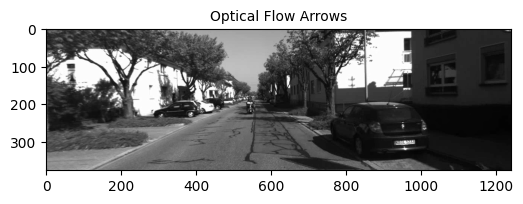

In [25]:
if __name__ == "__main__":
    video_file = "camera_movement.mp4"  
    main(video_file)

Movement Type: Object Movement


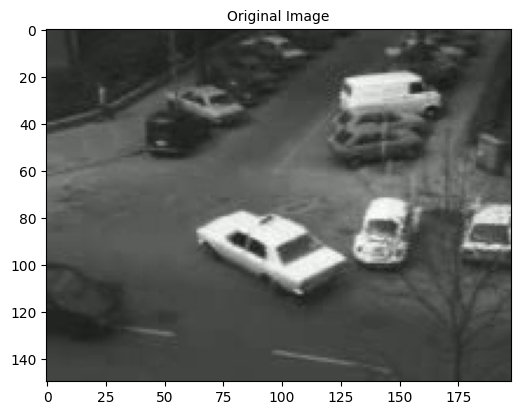

In [42]:
if __name__ == "__main__":
    video_file = "video_taxi.mp4"  
    main(video_file)

Movement Type: Object Movement


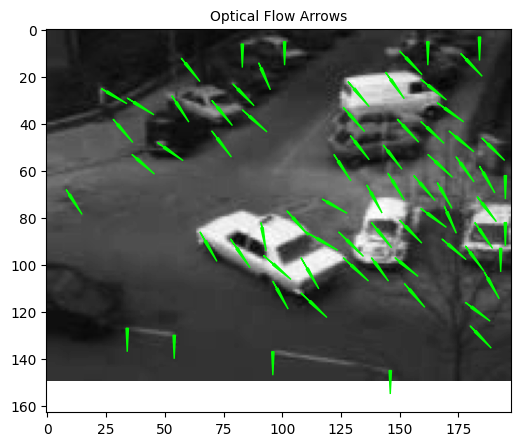

In [29]:
if __name__ == "__main__":
    video_file = "video_taxi.mp4"  
    main(video_file)

Movement Type: Object Movement


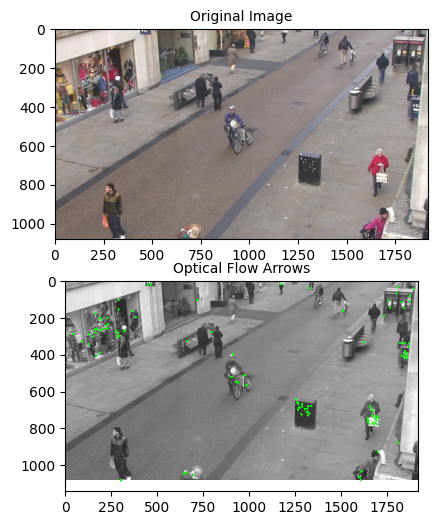

In [7]:
if __name__ == "__main__":
    video_file = "object_movement.avi"  
    main(video_file)

Movement Type: Object Movement


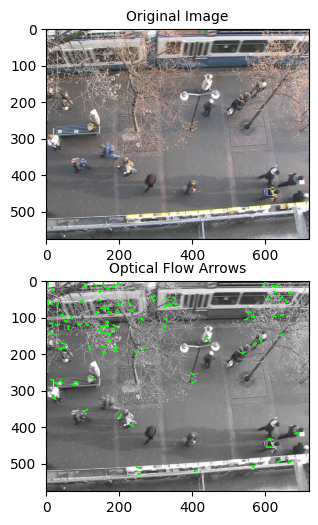

In [8]:
if __name__ == "__main__":
    video_file = "seq_hotel.avi" 
    main(video_file)

Movement Type: Object Movement


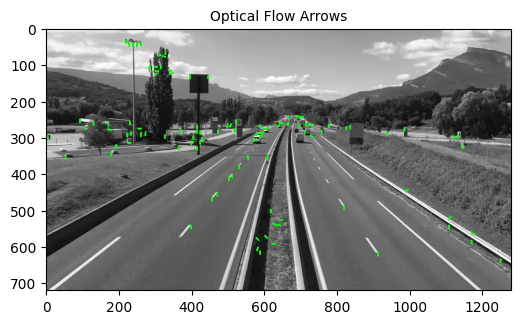

In [30]:
if __name__ == "__main__":
    video_file = "test3.mp4" 
    main(video_file)

Movement Type: Object Movement


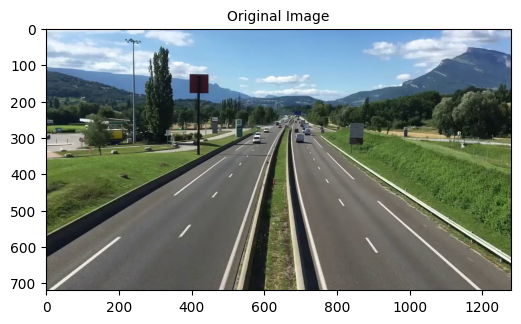

In [43]:
if __name__ == "__main__":
    video_file = "test3.mp4" 
    main(video_file)

In [46]:
def main(img_file1, img_file2):
    frame1 = cv2.imread(img_file1)
    frame2 = cv2.imread(img_file2)

    if frame1 is None or frame2 is None:
        print("Error: Could not read images.")
        return

    gray_frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray_frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    u, v = optical_flow(gray_frame1, gray_frame2, window_size=15)

    # Calculate the magnitude of optical flow
    magnitude = np.sqrt(u ** 2 + v ** 2)

    # Calculate histogram of magnitudes
    hist, _ = np.histogram(magnitude, bins=50, range=(0, np.max(magnitude)))

    # Determine the threshold for object movement based on the histogram
    threshold_ratio = 0.1
    large_movement_threshold = 50  # A higher threshold for large movements
    threshold = threshold_ratio * np.max(hist)

    # Classify movement type based on the histogram
    large_movement_hist = hist[hist > large_movement_threshold]
    object_movement_count = np.sum(large_movement_hist)
    total_count = np.sum(hist)

    if object_movement_count / total_count > threshold_ratio:
        movement_type = "Large Object Movement"
    else:
        movement_type = "Camera Movement"

    print("Movement Type:", movement_type)

    #display_opticalflow_arrows(gray_frame1, gray_frame2, u, v)
    display_opticalflow_arrows(frame1, gray_frame1, gray_frame2, u, v)



Movement Type: Large Object Movement


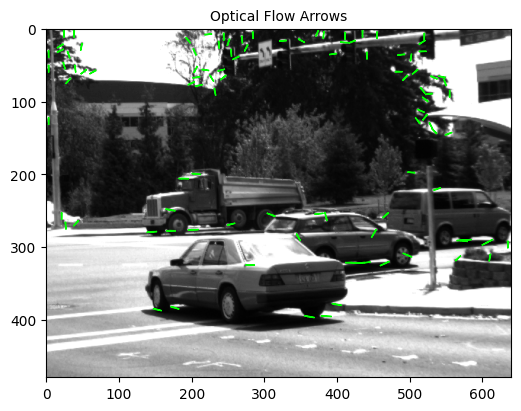

In [32]:
main("frame10.png", "frame11.png")

Movement Type: Large Object Movement


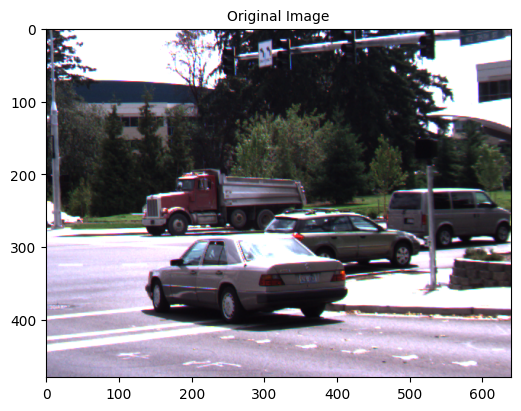

In [47]:
main("frame10.png", "frame11.png")

Movement Type: Large Object Movement


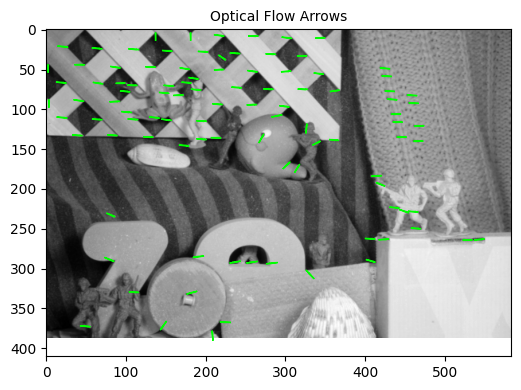

In [33]:
main("Army/frame10.png", "Army/frame11.png")

Movement Type: Large Object Movement


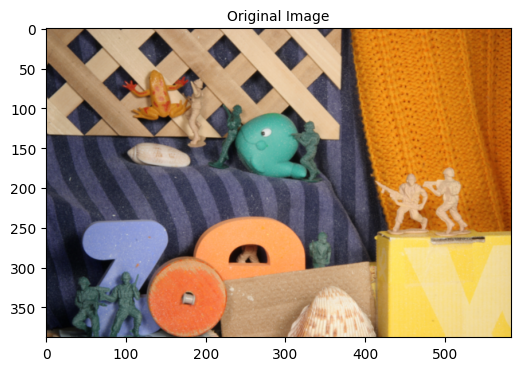

In [48]:
main("Army/frame10.png", "Army/frame11.png")

Movement Type: Large Object Movement


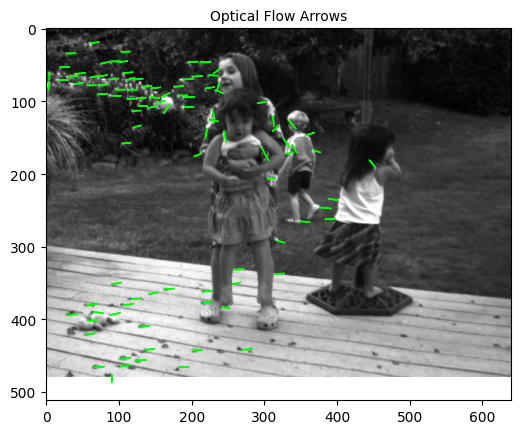

In [34]:
main("Backyard/frame10.png", "Backyard/frame11.png")

Movement Type: Large Object Movement


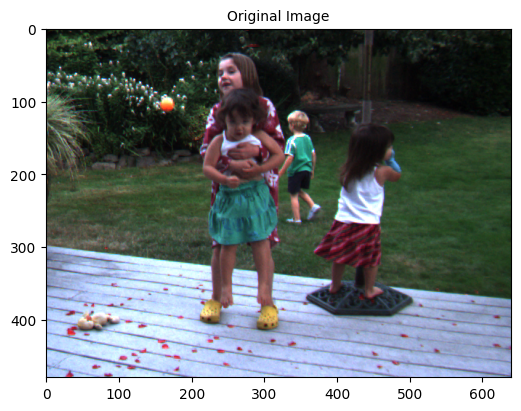

In [49]:
main("Backyard/frame10.png", "Backyard/frame11.png")

Movement Type: Large Object Movement


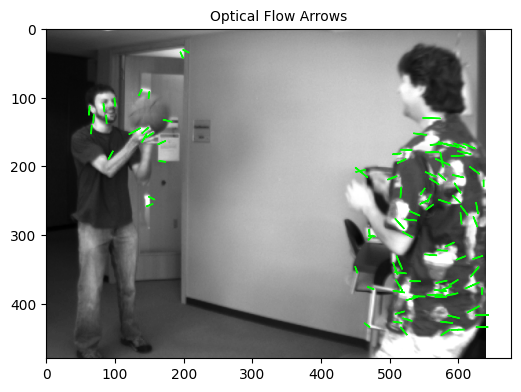

In [35]:
main("Basketball/frame10.png", "Basketball/frame11.png")

Movement Type: Large Object Movement


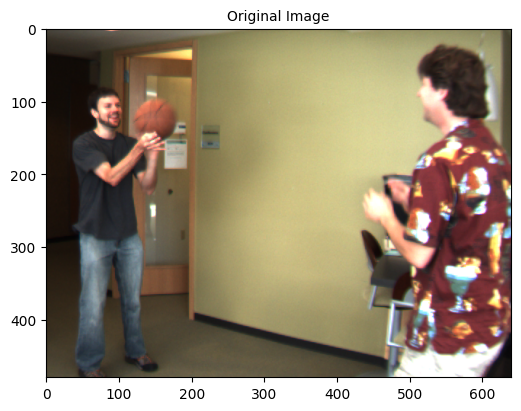

In [50]:
main("Basketball/frame10.png", "Basketball/frame11.png")

Movement Type: Large Object Movement


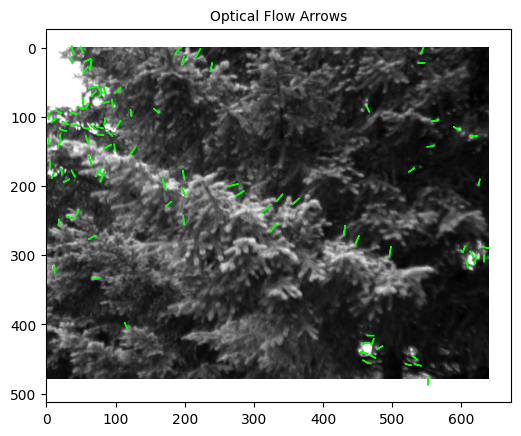

In [36]:
main("Evergreen/frame10.png", "Evergreen/frame11.png")

In [ ]:
main("Evergreen/frame10.png", "Evergreen/frame11.png")

Movement Type: Large Object Movement


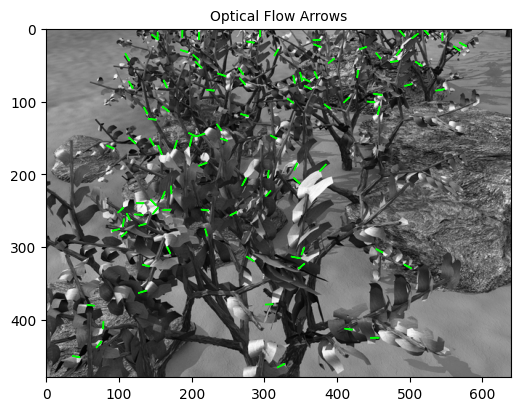

In [37]:
main("Grove/frame10.png", "Grove/frame11.png")

Movement Type: Large Object Movement


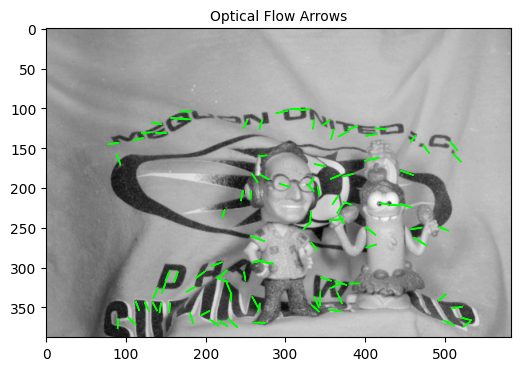

In [38]:
main("Mequon/frame10.png", "Mequon/frame11.png")

Movement Type: Large Object Movement


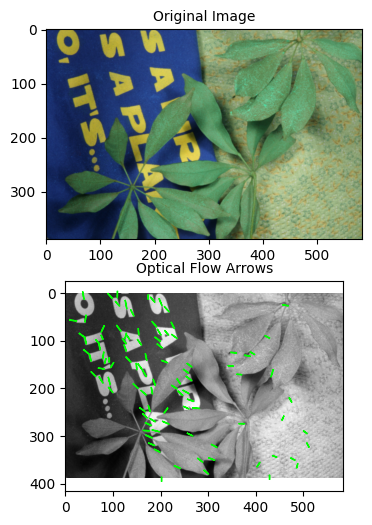

In [18]:
main("Schefflera/frame10.png", "Schefflera/frame11.png")

Movement Type: Large Object Movement


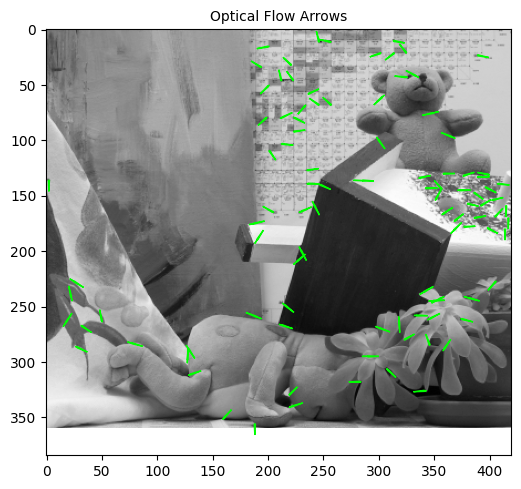

In [39]:
main("Teddy/frame10.png", "Teddy/frame11.png")

Movement Type: Large Object Movement


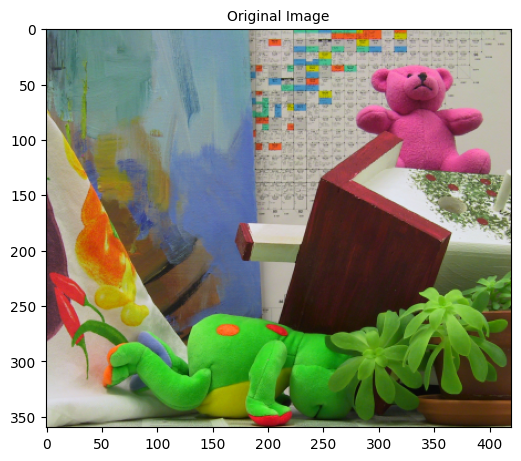

In [51]:
main("Teddy/frame10.png", "Teddy/frame11.png")

Movement Type: Large Object Movement


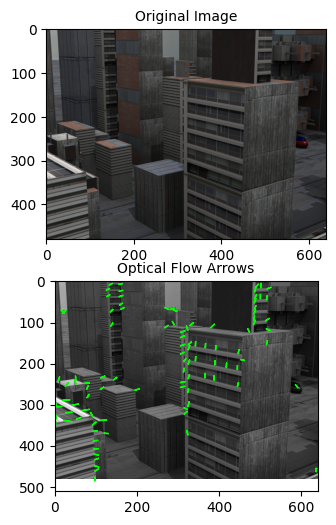

In [20]:
main("Urban/frame10.png", "Urban/frame11.png")

Movement Type: Large Object Movement


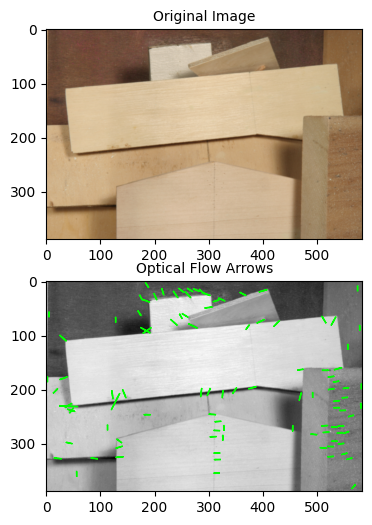

In [21]:
main("Wooden/frame10.png", "Wooden/frame11.png")

Movement Type: Large Object Movement


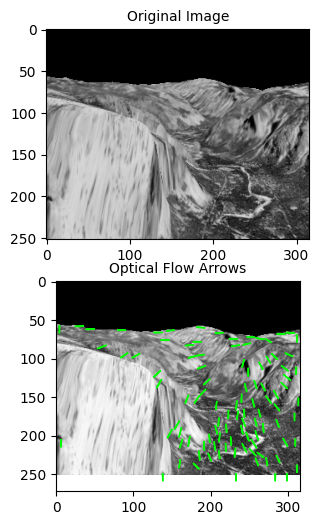

In [22]:
main("Yosemite/frame10.png", "Yosemite/frame11.png")